### Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

importing the train data set

In [2]:
train_df= pd.read_csv("test_storming_round.csv")
train_df.head()

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   de9a845f         43         6/1/2020                4/1/2022   
1       2   1450745b         32         5/1/2019                8/1/2022   
2       3   5c4dd08c         52         6/1/2019                6/1/2022   
3       4   3c7a8b50         21         5/1/2021                9/1/2023   
4       5   3dd0c2a1         33         9/1/2022               11/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   9/1/2024                             0                              2   
1   9/1/2024                             1                              3   
2   9/1/2024                             2                              6   
3   9/1/2024                             1                              6   
4   9/1/2024                             0                              4   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                             12               17  ...                 14   
1                              4               13  ...                 12   
2                             17               27  ...                 21   
3                             17               26  ...                 15   
4                              2                8  ...                 14   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             6                              9   
1                             2                              2   
2                             5                              6   
3                             3                              2   
4                             5                              4   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              5                20                24   
1                              5                 9                14   
2                             10                21                34   
3                             10                15                33   
4                              6                15                15   

   ANBP_value  net_income  number_of_policy_holders  \
0      511320       86955                         0   
1      296660       55062                         9   
2      833544      224429                         0   
3     2972409      439159                        15   
4      168150       18195                        60   

   number_of_cash_payment_policies  
0                               48  
1                               56  
2                               34  
3                               33  
4                               90  

[5 rows x 23 columns]

basic Description check

In [3]:
print(f"Shape of the dataset: {train_df.shape}")
print(train_df.info())
train_df.describe()

Shape of the dataset: (914, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           914 non-null    int64 
 1   agent_code                       914 non-null    object
 2   agent_age                        914 non-null    int64 
 3   agent_join_month                 914 non-null    object
 4   first_policy_sold_month          914 non-null    object
 5   year_month                       914 non-null    object
 6   unique_proposals_last_7_days     914 non-null    int64 
 7   unique_proposals_last_15_days    914 non-null    int64 
 8   unique_proposals_last_21_days    914 non-null    int64 
 9   unique_proposal                  914 non-null    int64 
 10  unique_quotations_last_7_days    914 non-null    int64 
 11  unique_quotations_last_15_days   914 non-null    int64 
 12  uniq

row_id   agent_age  unique_proposals_last_7_days  \
count  914.000000  914.000000                    914.000000   
mean   457.500000   40.506565                      1.540481   
std    263.993371   11.698497                      1.120848   
min      1.000000   20.000000                      0.000000   
25%    229.250000   31.000000                      1.000000   
50%    457.500000   41.000000                      2.000000   
75%    685.750000   51.000000                      3.000000   
max    914.000000   60.000000                      3.000000   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                     914.000000                     914.000000   
mean                        2.903720                       9.798687   
std                         1.974517                       5.999722   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   

       unique_proposal  unique_quotations_last_7_days  \
count       914.000000                     914.000000   
mean         17.318381                       2.096280   
std           6.695894                       1.383492   
min           2.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          23.000000                       3.000000   
max          33.000000                       4.000000   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                      914.000000                      914.000000   
mean                         2.994530                        4.450766   
std                          1.995332                        2.911676   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   

       unique_quotations  unique_customers_last_7_days  \
count         914.000000                    914.000000   
mean           13.928884                      3.088621   
std             4.592290                      1.595387   
min             2.000000                      0.000000   
25%            11.000000                      2.000000   
50%            14.000000                      3.000000   
75%            17.000000                      4.000000   
max            30.000000                      6.000000   

       unique_customers_last_15_days  unique_customers_last_21_days  \
count                     914.000000                     914.000000   
mean                        5.025164                       7.405908   
std                         2.402632                       3.537997   
min                         0.000000                       0.000000   
25%                         3.000000                       5.000000   
50%                         5.000000                       7.000000   
75%                         7.000000                      10.000000   
max                        10.000000                      15.000000   

       unique_customers  new_policy_count    ANBP_value     net_income  \
count        914.000000        914.000000  9.140000e+02     914.000000   
mean          15.519694         20.114880  1.008371e+06  226420.912473   
std            4.767559          9.636944  8.221544e+05  175909.860712   
min            3.000000          0.000000  0.000000e+00    2396.000000   
25%           12.000000         14.250000  3.419635e+05   92338.750000   
50%           15.000000 

changeing date data type into DATE type 

In [4]:
# Convert 'year_month' to datetime if needed
train_df['year_month'] = pd.to_datetime(train_df['year_month'], format='%m/%d/%Y')

# Convert 'agent_join_month' and 'first_policy_sold_month' to datetime (adjusting format if needed)
train_df['agent_join_month'] = pd.to_datetime(train_df['agent_join_month'], format='%m/%d/%Y')
train_df['first_policy_sold_month'] = pd.to_datetime(train_df['first_policy_sold_month'], format='%m/%d/%Y')

# Checking if the conversion is correct
print(train_df[['year_month', 'agent_join_month', 'first_policy_sold_month']].head())



  year_month agent_join_month first_policy_sold_month
0 2024-09-01       2020-06-01              2022-04-01
1 2024-09-01       2019-05-01              2022-08-01
2 2024-09-01       2019-06-01              2022-06-01
3 2024-09-01       2021-05-01              2023-09-01
4 2024-09-01       2022-09-01              2023-11-01


In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   row_id                           914 non-null    int64         
 1   agent_code                       914 non-null    object        
 2   agent_age                        914 non-null    int64         
 3   agent_join_month                 914 non-null    datetime64[ns]
 4   first_policy_sold_month          914 non-null    datetime64[ns]
 5   year_month                       914 non-null    datetime64[ns]
 6   unique_proposals_last_7_days     914 non-null    int64         
 7   unique_proposals_last_15_days    914 non-null    int64         
 8   unique_proposals_last_21_days    914 non-null    int64         
 9   unique_proposal                  914 non-null    int64         
 10  unique_quotations_last_7_days    914 non-null    int64        

checking Null values 

In [6]:
# Check for missing values
missing_data = train_df.isnull().sum()
missing_percentage = (missing_data / train_df.shape[0]) * 100
print(f"Missing Data Percentage:\n{missing_percentage}")


Missing Data Percentage:
row_id                             0.0
agent_code                         0.0
agent_age                          0.0
agent_join_month                   0.0
first_policy_sold_month            0.0
year_month                         0.0
unique_proposals_last_7_days       0.0
unique_proposals_last_15_days      0.0
unique_proposals_last_21_days      0.0
unique_proposal                    0.0
unique_quotations_last_7_days      0.0
unique_quotations_last_15_days     0.0
unique_quotations_last_21_days     0.0
unique_quotations                  0.0
unique_customers_last_7_days       0.0
unique_customers_last_15_days      0.0
unique_customers_last_21_days      0.0
unique_customers                   0.0
new_policy_count                   0.0
ANBP_value                         0.0
net_income                         0.0
number_of_policy_holders           0.0
number_of_cash_payment_policies    0.0
dtype: float64


visualizing Null values

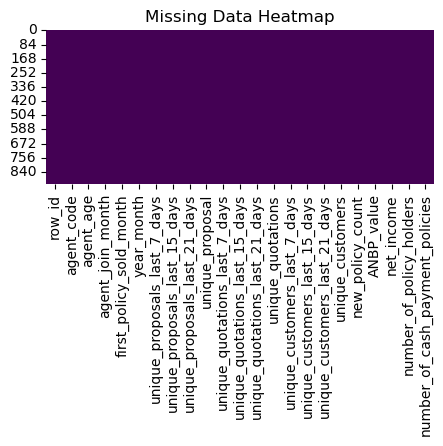

In [7]:
# Visualize missing data
plt.figure(figsize=(5, 2))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

getting all the unique values in each columns

In [8]:
# Check the number of unique values in each column
unique_values = train_df.nunique()

# Display the number of unique values for each column
print(unique_values)


row_id                             914
agent_code                         914
agent_age                           41
agent_join_month                    65
first_policy_sold_month             28
year_month                           1
unique_proposals_last_7_days         4
unique_proposals_last_15_days        7
unique_proposals_last_21_days       21
unique_proposal                     32
unique_quotations_last_7_days        5
unique_quotations_last_15_days       7
unique_quotations_last_21_days      10
unique_quotations                   29
unique_customers_last_7_days         7
unique_customers_last_15_days       11
unique_customers_last_21_days       16
unique_customers                    28
new_policy_count                    39
ANBP_value                         819
net_income                         912
number_of_policy_holders            63
number_of_cash_payment_policies    158
dtype: int64


### Sales Trend Over Time

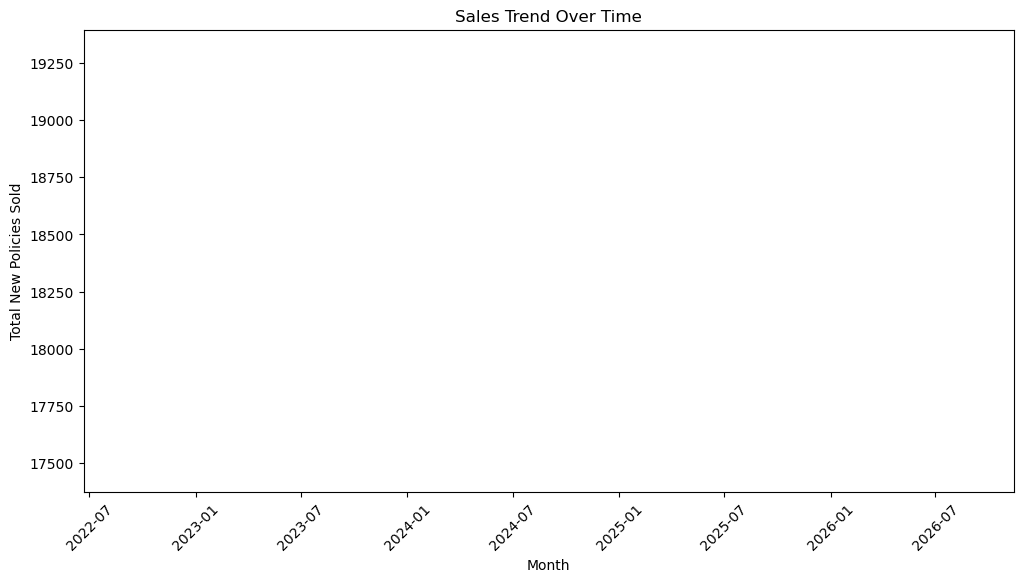

In [9]:
# Aggregating sales data by month
monthly_sales = train_df.groupby('year_month')['new_policy_count'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['new_policy_count'])
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total New Policies Sold')
plt.xticks(rotation=45)
plt.show()


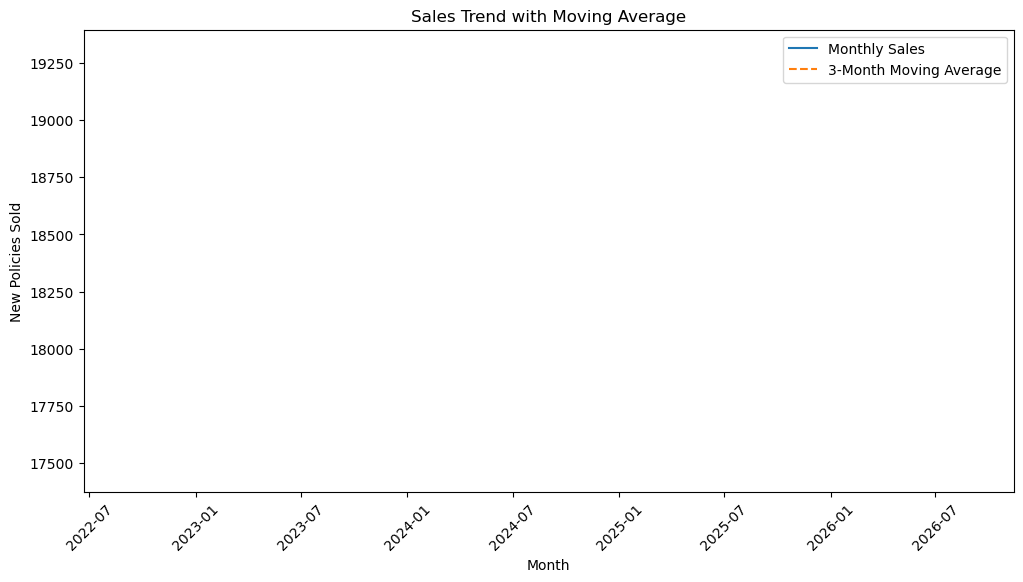

In [10]:
# Adding a moving average to smooth the sales trend
monthly_sales['moving_avg'] = monthly_sales['new_policy_count'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['new_policy_count'], label='Monthly Sales')
plt.plot(monthly_sales['year_month'], monthly_sales['moving_avg'], label='3-Month Moving Average', linestyle='--')
plt.title('Sales Trend with Moving Average')
plt.xlabel('Month')
plt.ylabel('New Policies Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [11]:
categorical_columns = [
    'agent_code',
    'agent_join_month',
    'first_policy_sold_month',
    'year_month'
]

numerical_columns = [
    'agent_age',
    'unique_proposals_last_7_days',
    'unique_proposals_last_15_days',
    'unique_proposals_last_21_days',
    'unique_proposal',
    'unique_quotations_last_7_days',
    'unique_quotations_last_15_days',
    'unique_quotations_last_21_days',
    'unique_quotations',
    'unique_customers_last_7_days',
    'unique_customers_last_15_days',
    'unique_customers_last_21_days',
    'unique_customers',
    'new_policy_count',
    'ANBP_value',
    'net_income',
    'number_of_policy_holders',
    'number_of_cash_payment_policies'
]


###  Univariate Analysis: Plot histograms for numerical features

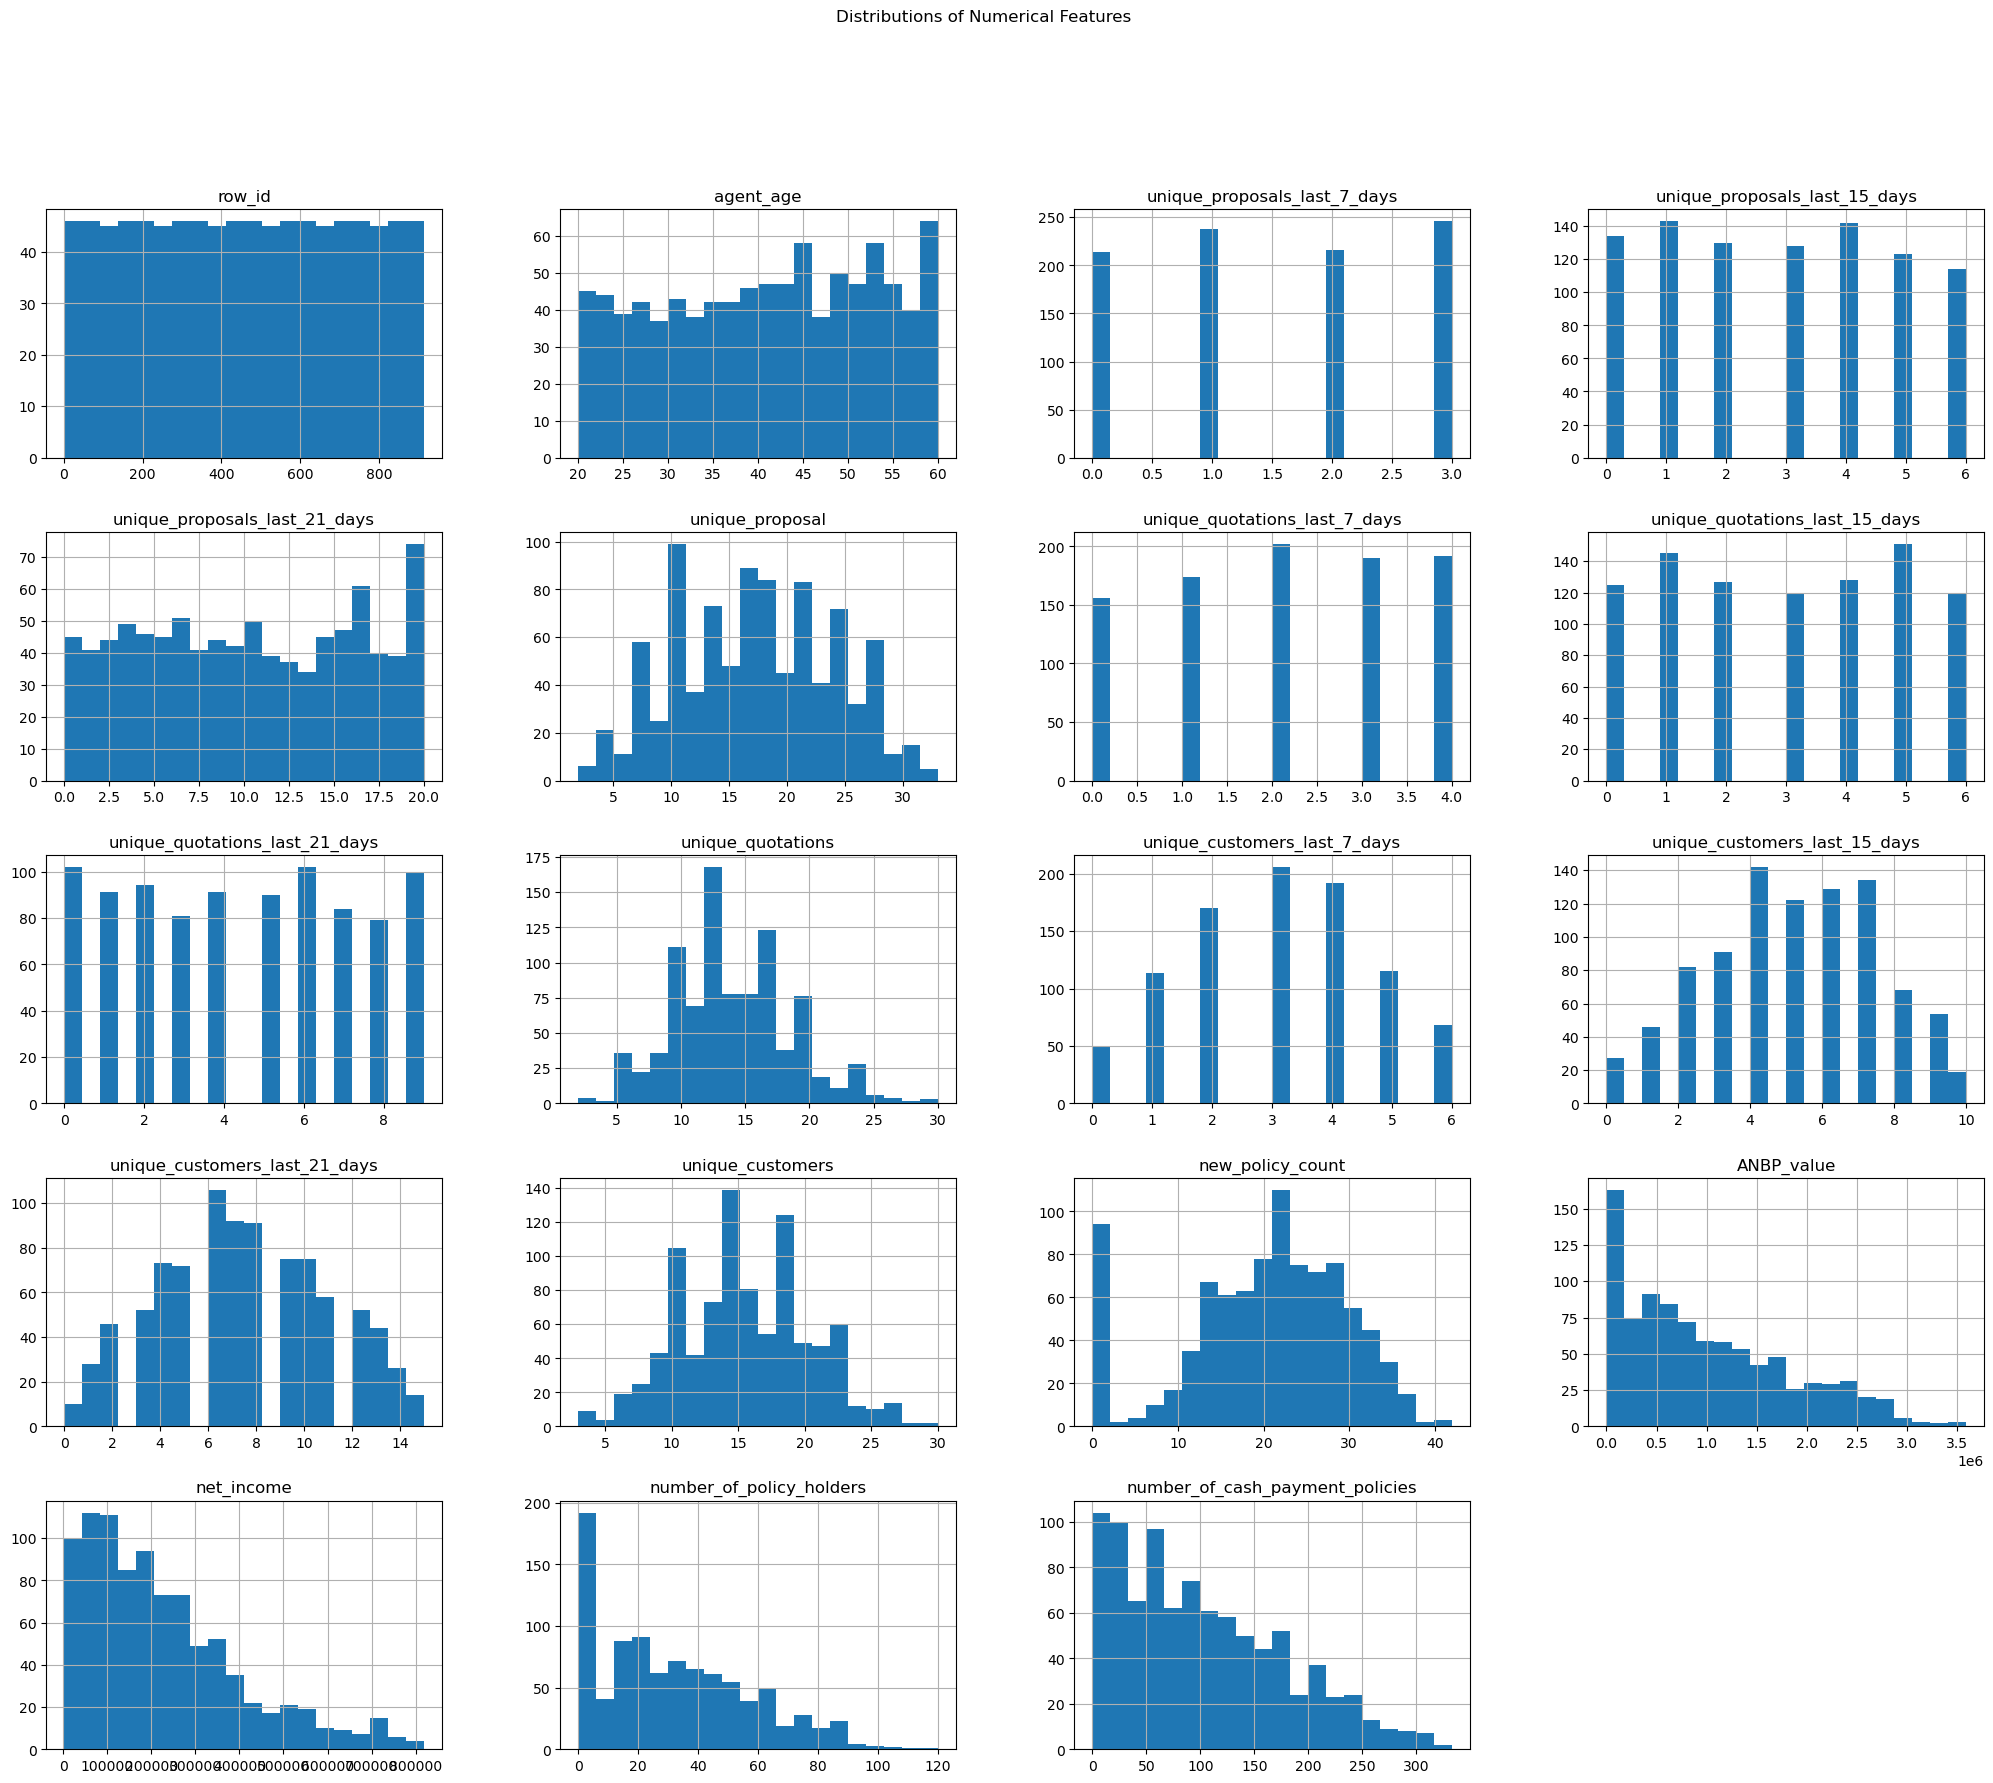

In [12]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_cols].hist(bins=20, figsize=(25, 20))
plt.suptitle("Distributions of Numerical Features")
plt.show()

### Added Logrithm for skwwed 4 numasrical columns

In [13]:
# import numpy as np

# # Log transformation for skewed columns
# train_df['ANBP_value'] = np.log1p(train_df['ANBP_value'])  # log(x+1) to avoid log(0)
# # train_df['net_income'] = np.log1p(train_df['net_income'])
# # train_df['number_of_policy_holders'] = np.log1p(train_df['number_of_policy_holders'])
# # train_df['number_of_cash_payment_policies'] = np.log1p(train_df['number_of_cash_payment_policies'])


In [14]:
# Check the distribution after transformation
# # train_df[['ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies']].hist(bins=20, figsize=(15, 10))
# train_df[['ANBP_value']].hist(bins=20, figsize=(15, 10))
# plt.suptitle("Distributions of Transformed Numerical Features")
# plt.show()

### BoxCox Tranformation applied for numarical columns

checked those 4 numarical columns with vaious of Transformation methods (log , squaroot , Boxcox) , we got best with BOxCox transfoaramation.

In [15]:
from scipy import stats

# Box-Cox transformation (must be applied only on strictly positive values)
train_df['ANBP_value_boxcox_added'], _ = stats.boxcox(train_df['ANBP_value'] + 1)  # Adding 1 to avoid log(0)
train_df['net_income_boxcox_added'], _ = stats.boxcox(train_df['net_income'] + 1)
train_df['number_of_policy_holders_boxcox_added'], _ = stats.boxcox(train_df['number_of_policy_holders'] + 1)
train_df['number_of_cash_payment_policies_boxcox_added'], _ = stats.boxcox(train_df['number_of_cash_payment_policies'] + 1)



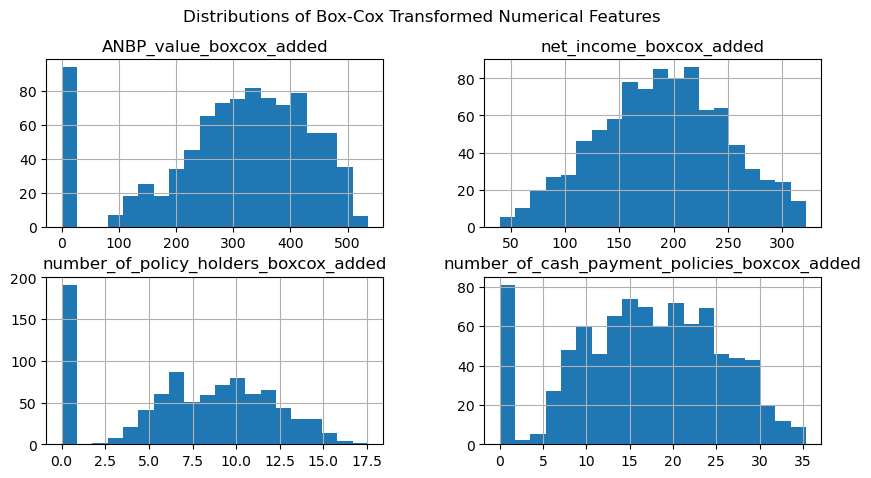

In [16]:
train_df[['ANBP_value_boxcox_added', 'net_income_boxcox_added', 'number_of_policy_holders_boxcox_added', 'number_of_cash_payment_policies_boxcox_added']].hist(bins=20, figsize=(10, 5))
# train_df[['ANBP_value_boxcox_added']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Box-Cox Transformed Numerical Features")
plt.show()

In [17]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   row_id                                        914 non-null    int64         
 1   agent_code                                    914 non-null    object        
 2   agent_age                                     914 non-null    int64         
 3   agent_join_month                              914 non-null    datetime64[ns]
 4   first_policy_sold_month                       914 non-null    datetime64[ns]
 5   year_month                                    914 non-null    datetime64[ns]
 6   unique_proposals_last_7_days                  914 non-null    int64         
 7   unique_proposals_last_15_days                 914 non-null    int64         
 8   unique_proposals_last_21_days                 914 non-null    int64   

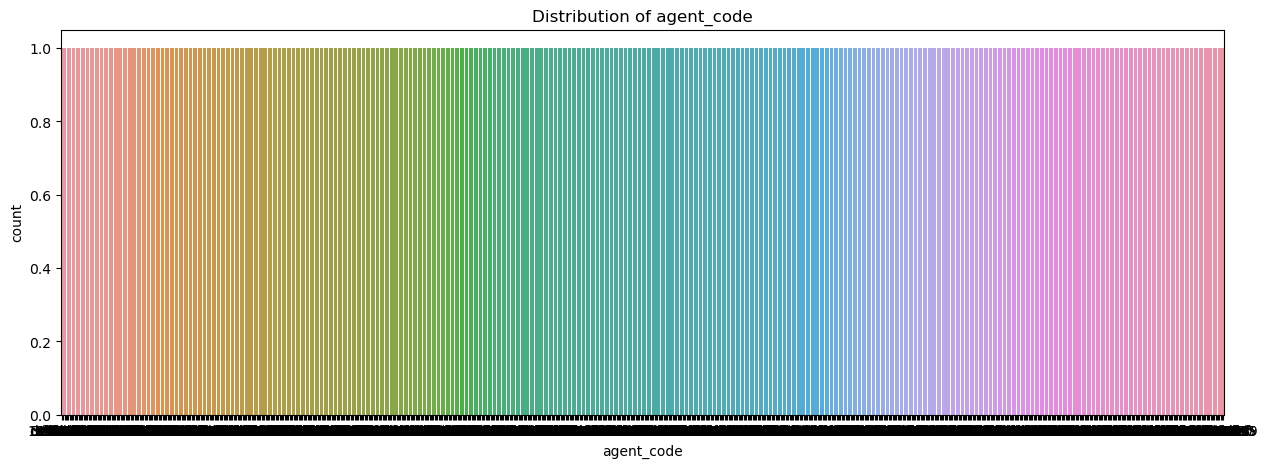

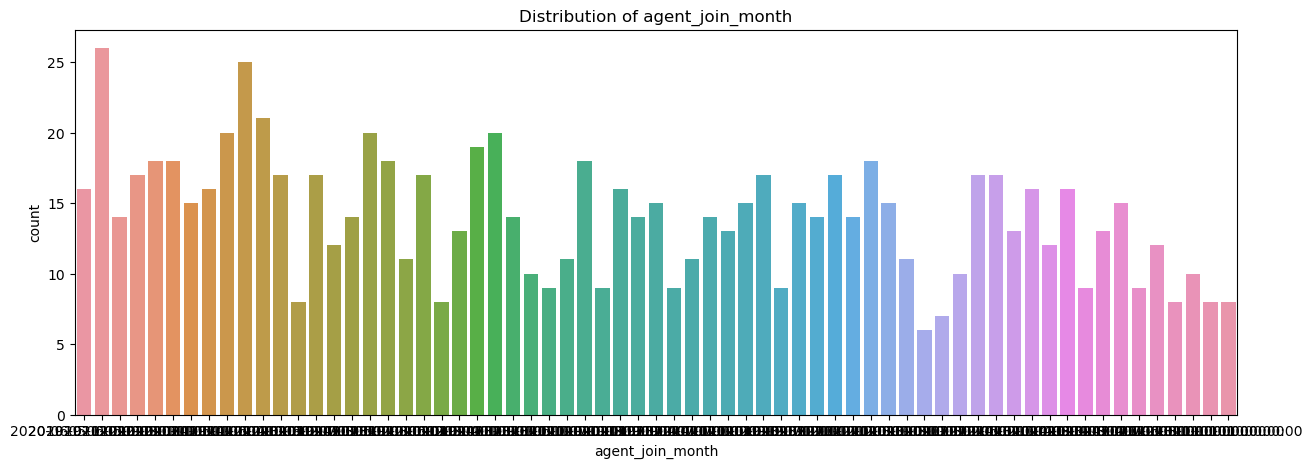

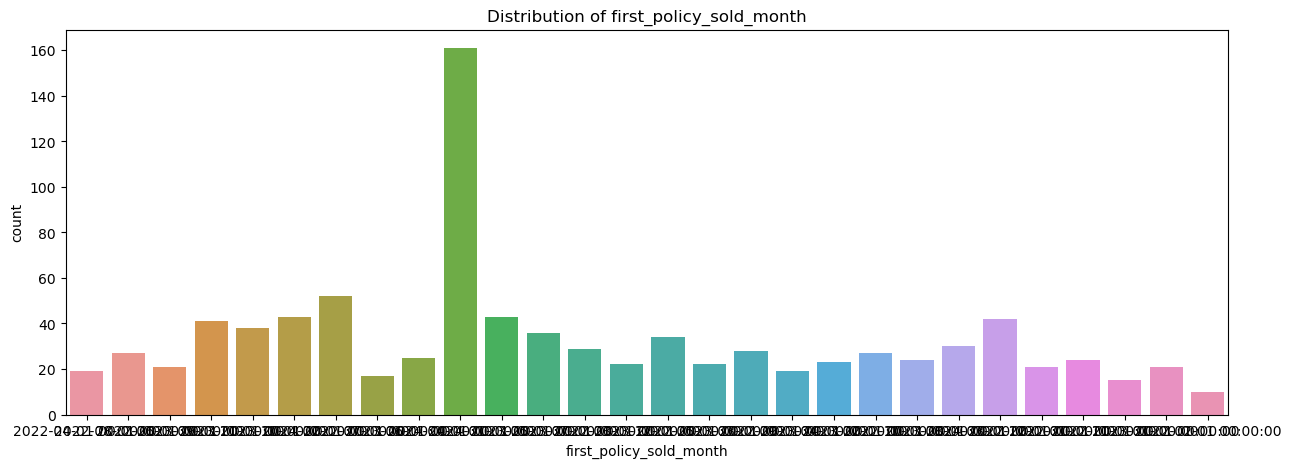

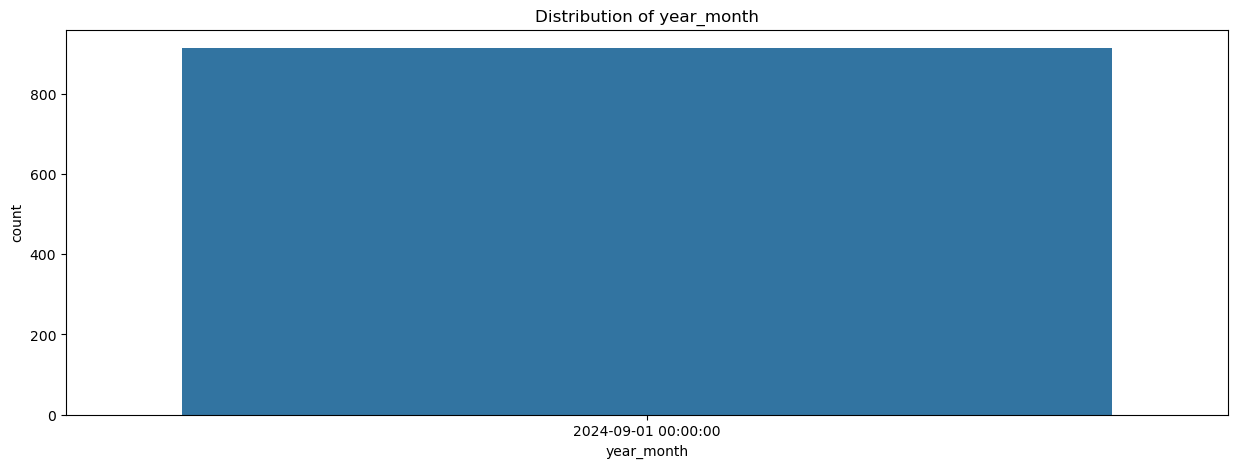

In [18]:
# Plot the distribution of categorical features
for col in categorical_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=train_df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


In [19]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   row_id                                        914 non-null    int64         
 1   agent_code                                    914 non-null    object        
 2   agent_age                                     914 non-null    int64         
 3   agent_join_month                              914 non-null    datetime64[ns]
 4   first_policy_sold_month                       914 non-null    datetime64[ns]
 5   year_month                                    914 non-null    datetime64[ns]
 6   unique_proposals_last_7_days                  914 non-null    int64         
 7   unique_proposals_last_15_days                 914 non-null    int64         
 8   unique_proposals_last_21_days                 914 non-null    int64   

### Now lets chaneg the Numarical column in order to New Box-Cox columns

In [20]:
categorical_columns = [
    'agent_code',
    'agent_join_month',
    'first_policy_sold_month',
    'year_month'
]

numerical_columns = [
    'agent_age',
    'unique_proposals_last_7_days',
    'unique_proposals_last_15_days',
    'unique_proposals_last_21_days',
    'unique_proposal',
    'unique_quotations_last_7_days',
    'unique_quotations_last_15_days',
    'unique_quotations_last_21_days',
    'unique_quotations',
    'unique_customers_last_7_days',
    'unique_customers_last_15_days',
    'unique_customers_last_21_days',
    'unique_customers',
    'new_policy_count',
    'ANBP_value_boxcox_added',
    'net_income_boxcox_added',
    'number_of_policy_holders_boxcox_added',
    'number_of_cash_payment_policies_boxcox_added'
]

## Check Outliers in each numaric columns

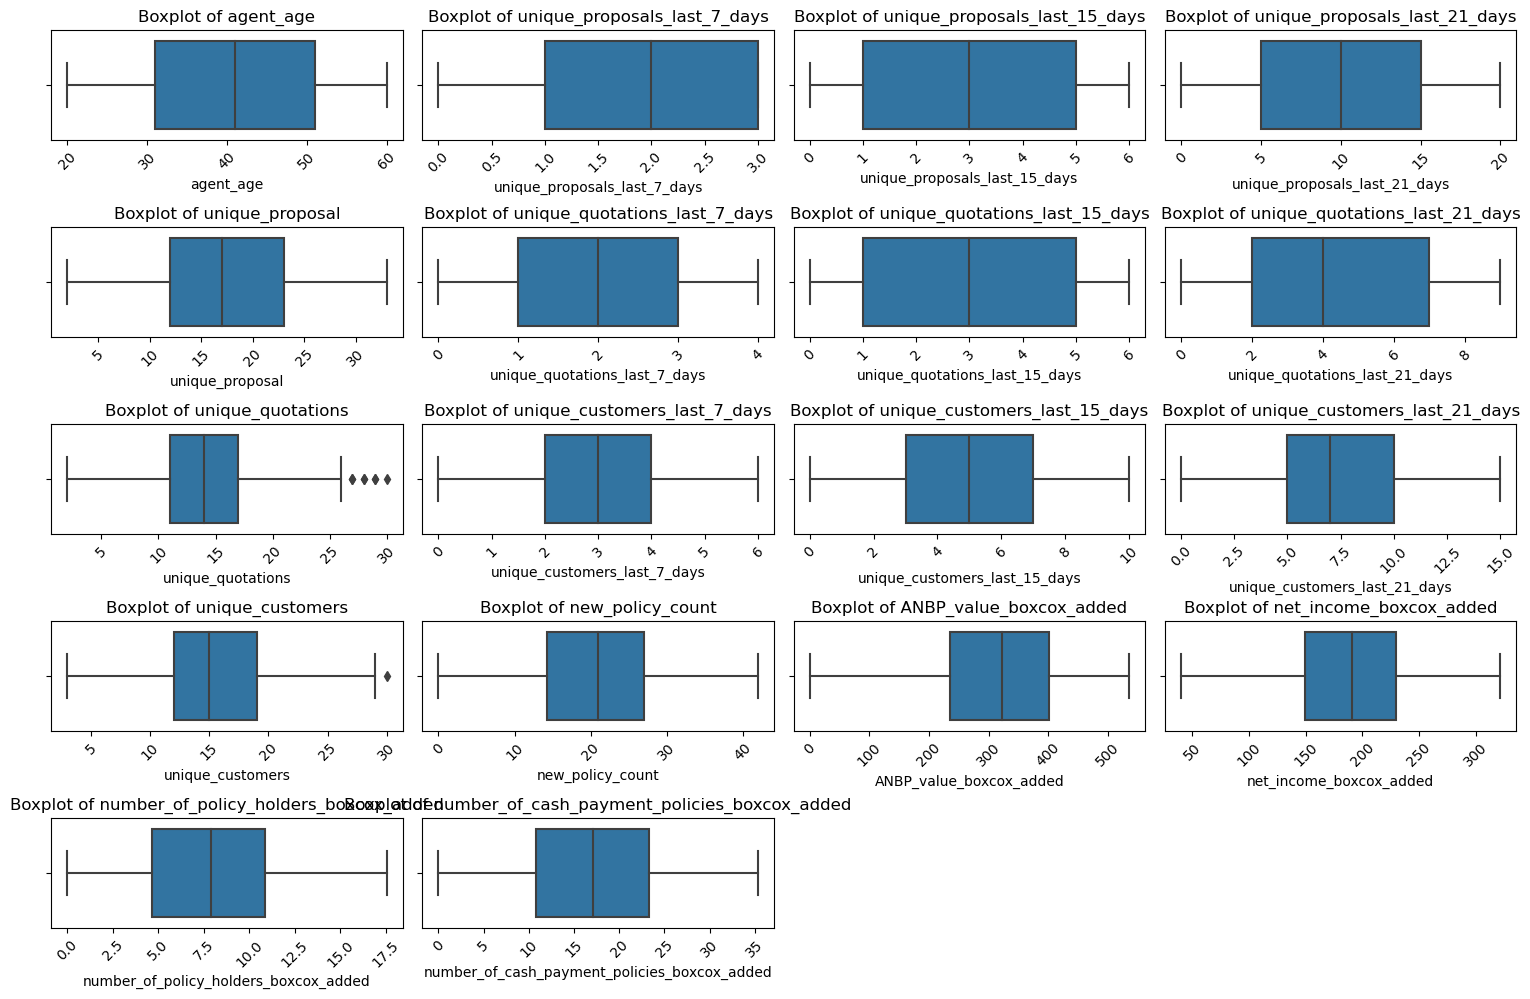

In [21]:
# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)  # Create a grid of 5x4 for the plots
    sns.boxplot(data=train_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

insted of removing , lets capped 

In [22]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)
    return df

# Apply capping to each column where outliers are suspected
for column in numerical_columns:
    train_df = cap_outliers(train_df, column)

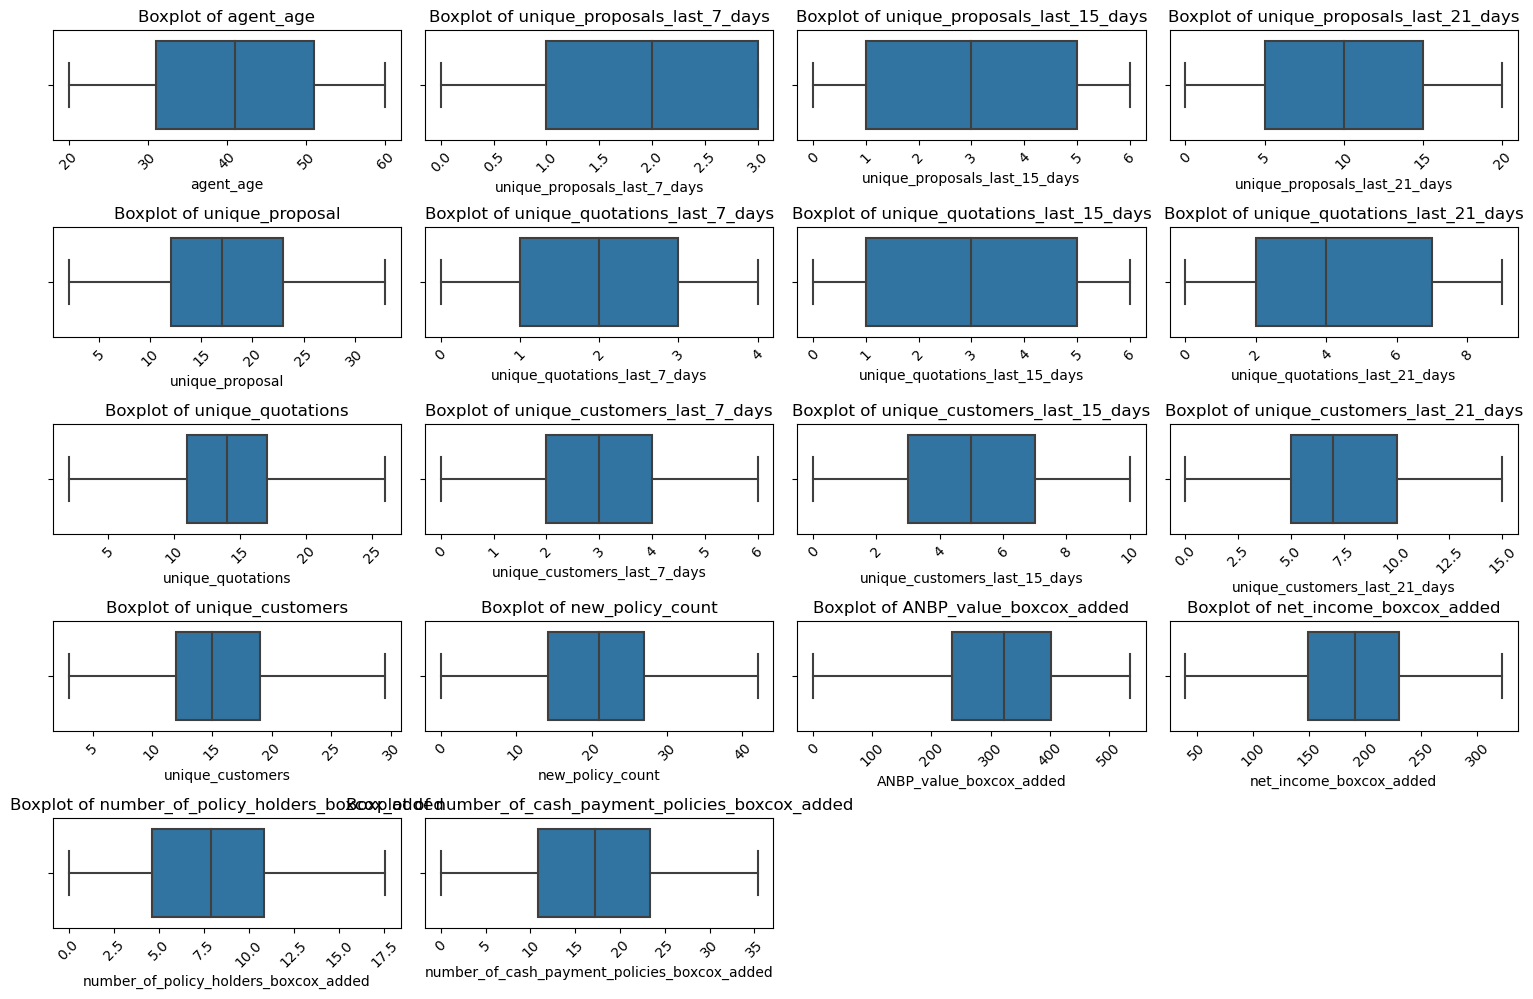

In [23]:
# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)  # Create a grid of 5x4 for the plots
    sns.boxplot(data=train_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Lets see correlation each feature to Target variabler

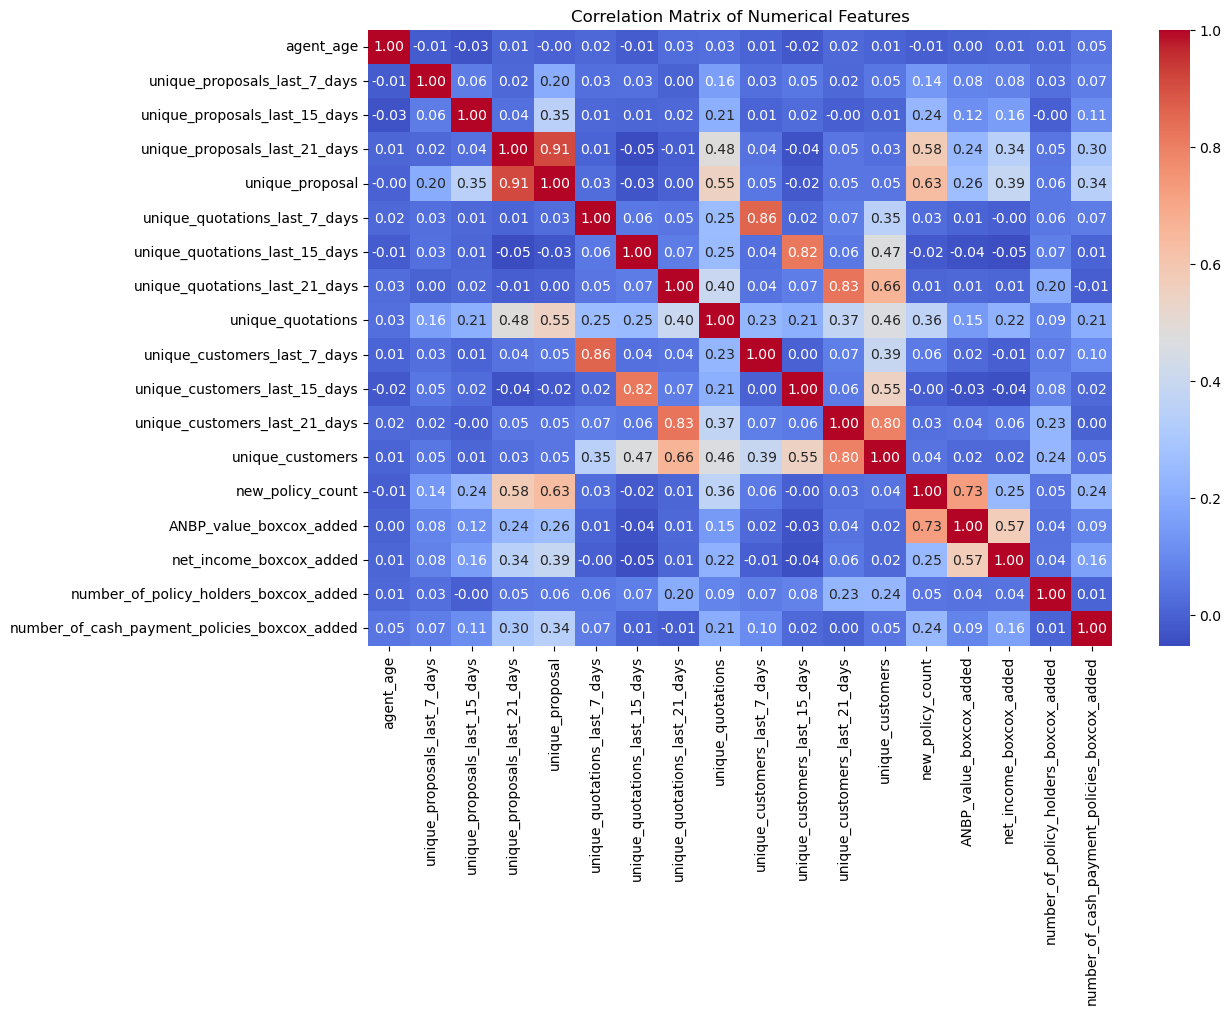

In [24]:
# Correlation matrix for numerical features
correlation_matrix = train_df[numerical_columns].corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

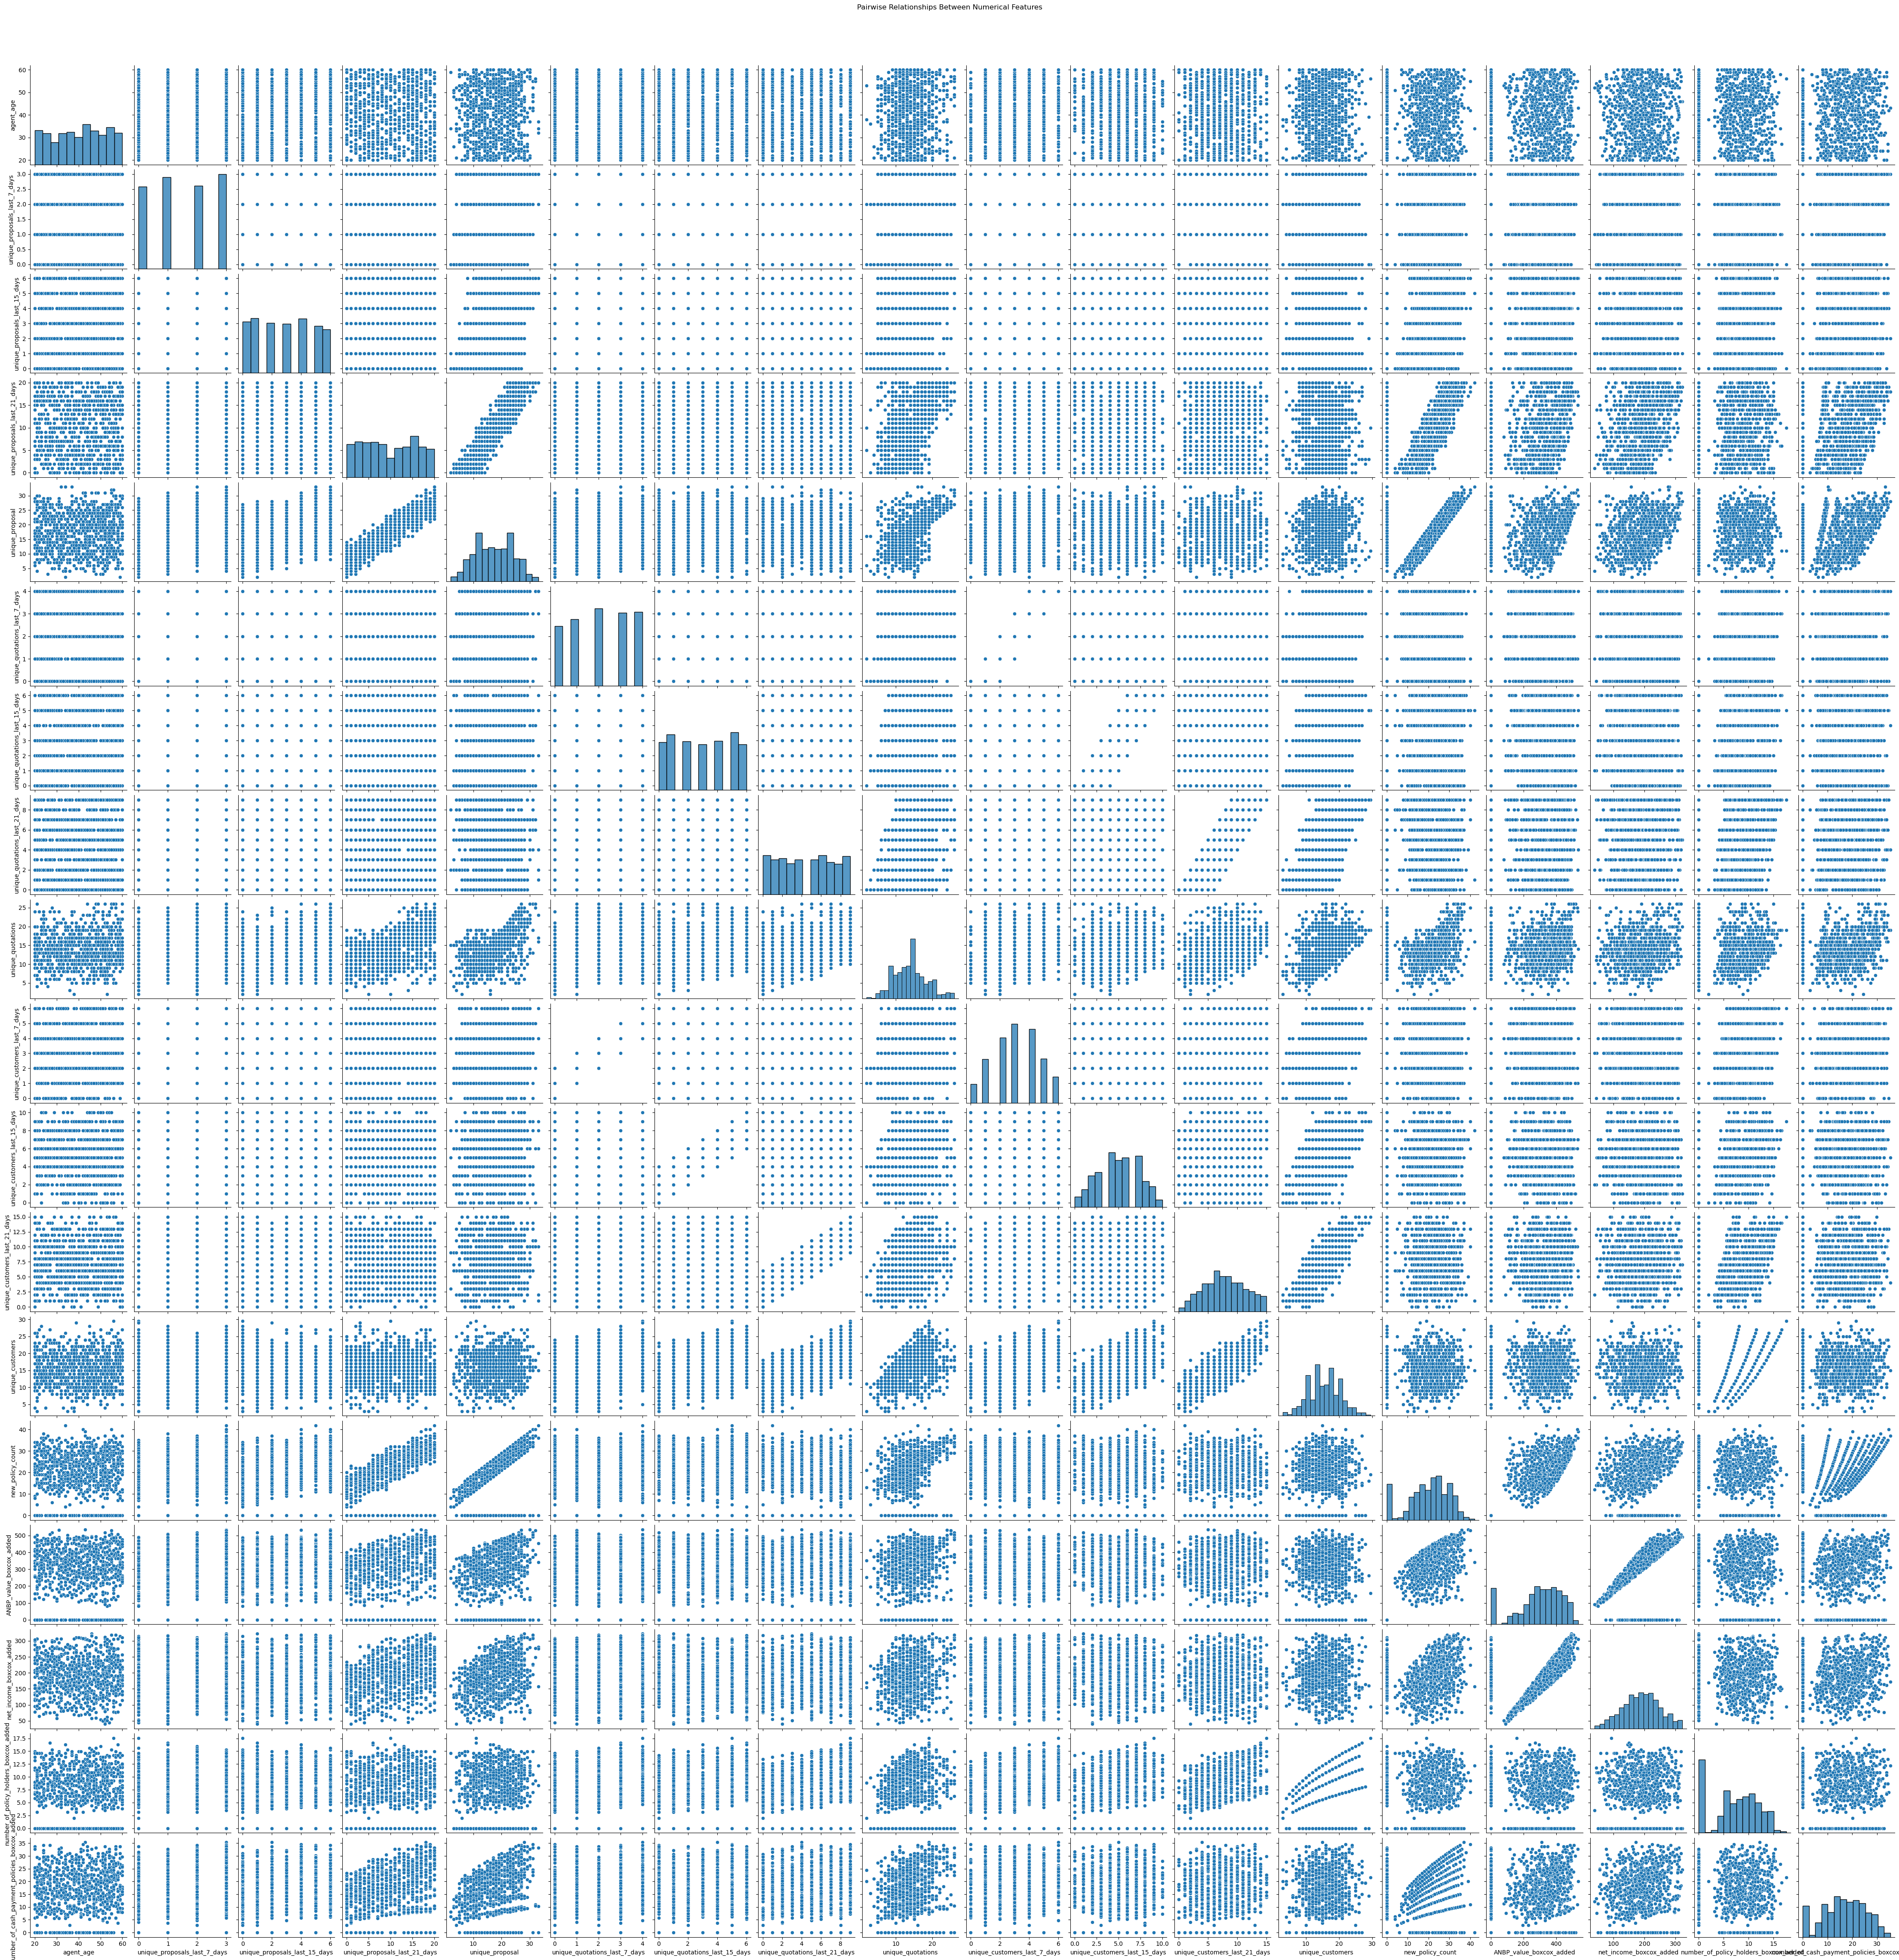

In [25]:
# Pairplot for numerical features
sns.pairplot(train_df[numerical_columns])
plt.suptitle('Pairwise Relationships Between Numerical Features', y=1.02)
plt.show()


In [26]:
# 1. Extract all unique agent IDs into a list
agent_ids = train_df['agent_code'].unique().tolist()

# 2. Select a few agents for plotting (you can select any 2 or 3 agents by agent_code)
selected_agents = agent_ids[:3]  # For example, select the first 3 agents (you can modify this list as needed

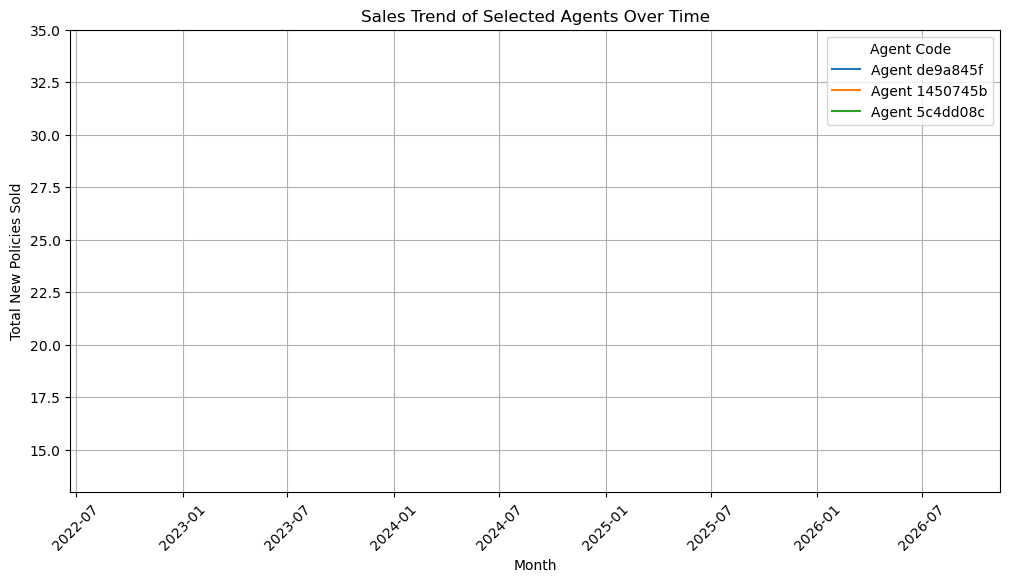

In [27]:
# 3. Filter data for selected agents and track their sales over time
plt.figure(figsize=(12, 6))

for agent in selected_agents:
    # Filter data for the current agent
    agent_data = train_df[train_df['agent_code'] == agent]
    
    # Aggregate sales over time (by month)
    agent_sales = agent_data.groupby('year_month')['new_policy_count'].sum().reset_index()

    # Plot the sales trend for this agent
    plt.plot(agent_sales['year_month'], agent_sales['new_policy_count'], label=f'Agent {agent}')

# 4. Customize the plot
plt.title('Sales Trend of Selected Agents Over Time')
plt.xlabel('Month')
plt.ylabel('Total New Policies Sold')
plt.xticks(rotation=45)
plt.legend(title='Agent Code')
plt.grid(True)
plt.show()

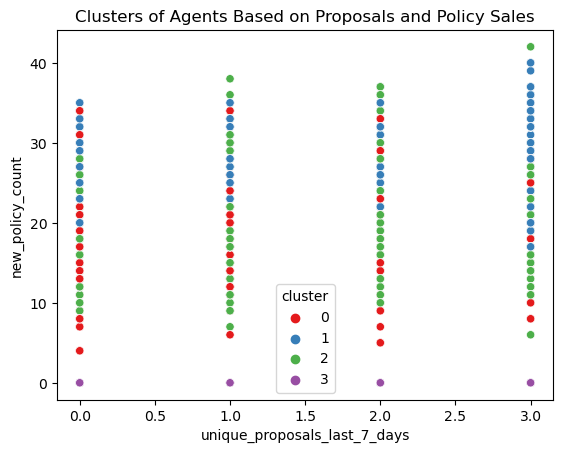

In [28]:
from sklearn.cluster import KMeans

# Example: Applying K-means clustering on selected features
kmeans = KMeans(n_clusters=4, random_state=42)
train_df['cluster'] = kmeans.fit_predict(train_df[numerical_columns])

# Plot clusters based on new_policy_count
sns.scatterplot(x='unique_proposals_last_7_days', y='new_policy_count', hue='cluster', data=train_df, palette='Set1')
plt.title('Clusters of Agents Based on Proposals and Policy Sales')
plt.show()


### Lets do PCA for columsn 

In [29]:
from sklearn.decomposition import PCA

# Create a PCA instance and reduce to 1 component (or 2 if needed)
pca = PCA(n_components=2)

# Apply PCA to the quotations columns
train_df[['pca_quotations_1' ,'pca_quotations_2']] = pca.fit_transform(train_df[['unique_quotations_last_7_days', 'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations']])

# Check the results
print(train_df[['unique_quotations_last_7_days', 'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations', 'pca_quotations_1' , 'pca_quotations_2']].head())


   unique_quotations_last_7_days  unique_quotations_last_15_days  \
0                              4                               5   
1                              0                               1   
2                              3                               4   
3                              3                               1   
4                              3                               4   

   unique_quotations_last_21_days  unique_quotations  pca_quotations_1  \
0                               1                 14         -0.718845   
1                               5                 12         -1.979674   
2                               4                 21          6.620056   
3                               7                 15          1.714881   
4                               6                 14          0.797343   

   pca_quotations_2  
0         -3.677631  
1          1.562797  
2         -2.895366  
3          2.246365  
4          1.208828  


### Pca column contains Negative values , since we are going with KNN for 8unsupervised , it better to scale 

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the PCA components
scaler = MinMaxScaler()
train_df[['pca_quotations_1', 'pca_quotations_2']] = scaler.fit_transform(train_df[['pca_quotations_1', 'pca_quotations_2']])

# Check the results
print(train_df[['pca_quotations_1', 'pca_quotations_2']].head())



   pca_quotations_1  pca_quotations_2
0          0.490702          0.258659
1          0.440733          0.656853
2          0.781560          0.318099
3          0.587156          0.708794
4          0.550792          0.629957


 ###  Since  84.88% of the variance is captured by 2 components, we can proceed to use these two new principal components (pca_customers_1 and pca_customers_2) in your model for further analysis or predictions.

In [31]:
# Check the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)


[0.65630506 0.18875524]


### Another data set

In [32]:
# Create a PCA instance and reduce to 1 component (or 2 if needed)
from sklearn.decomposition import PCA

# Apply PCA to the unique customers columns
pca = PCA(n_components=2)

# Apply PCA and store the results in two new columns: pca_customers_1 and pca_customers_2
train_df[['pca_customers_1', 'pca_customers_2']] = pca.fit_transform(train_df[['unique_customers_last_7_days', 'unique_customers_last_15_days', 'unique_customers_last_21_days', 'unique_customers']])

# Check the results
print(train_df[['unique_customers_last_7_days', 'unique_customers_last_15_days', 'unique_customers_last_21_days', 'unique_customers', 'pca_customers_1', 'pca_customers_2']].head())


   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             6                              9   
1                             2                              2   
2                             5                              6   
3                             3                              2   
4                             5                              4   

   unique_customers_last_21_days  unique_customers  pca_customers_1  \
0                              5              20.0         3.408090   
1                              5               9.0        -7.303343   
2                             10              21.0         6.222775   
3                             10              15.0         0.360044   
4                              6              15.0        -1.213346   

   pca_customers_2  
0         5.677432  
1        -2.276814  
2         0.464183  
3        -3.996167  
4         0.144573  


### Lets make those values positive using minmaxc scaler , cuz , we are using KNN foir unsupervised leaning



In [33]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the PCA components
scaler = MinMaxScaler()
train_df[['pca_customers_1', 'pca_customers_2']] = scaler.fit_transform(train_df[['pca_customers_1', 'pca_customers_2']])

# Check the results
print(train_df[['pca_customers_1', 'pca_customers_2']].head())

   pca_customers_1  pca_customers_2
0         0.580553         0.852753
1         0.237887         0.314606
2         0.670597         0.500049
3         0.483044         0.198282
4         0.432710         0.478425


###  Since 92% of the variance is captured by 2 components, we can proceed to use these two new principal components (pca_customers_1 and pca_customers_2) in your model for further analysis or predictions.

In [34]:
print(pca.explained_variance_ratio_)

[0.76576572 0.16402835]


### For unique Proposal

In [35]:
# Create a PCA instance and reduce to 1 component (or 2 if needed)
from sklearn.decomposition import PCA

# Apply PCA to the unique customers columns
pca = PCA(n_components=2)

# Apply PCA and store the results in two new columns: pca_customers_1 and pca_customers_2
train_df[['pca_proposal_1', 'pca_proposal_2']] = pca.fit_transform(train_df[['unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_proposal']])

# Check the results
print(train_df[['unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_proposal', 'pca_proposal_1', 'pca_proposal_2']].head())


   unique_proposals_last_7_days  unique_proposals_last_15_days  \
0                             0                              2   
1                             1                              3   
2                             2                              6   
3                             1                              6   
4                             0                              4   

   unique_proposals_last_21_days  unique_proposal  pca_proposal_1  \
0                             12               17        1.146005   
1                              4               13       -7.068504   
2                             17               27       12.171596   
3                             17               26       11.407120   
4                              2                8      -12.098431   

   pca_proposal_2  
0       -2.191032  
1        1.309644  
2        2.475637  
3        1.904440  
4        0.789121  


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the PCA components
scaler = MinMaxScaler()
train_df[['pca_proposal_1', 'pca_proposal_2']] = scaler.fit_transform(train_df[['pca_proposal_1', 'pca_proposal_2']])

# Check the results
print(train_df[['pca_proposal_1', 'pca_proposal_2']].head())

   pca_proposal_1  pca_proposal_2
0        0.523956        0.298884
1        0.300501        0.587447
2        0.823880        0.683560
3        0.803084        0.636476
4        0.163674        0.544539


###  these two components explain 97.47% of the variance, which is excellent. This indicates that these two components are highly effective at summarizing the data while reducing dimensionality.

In [37]:
print(pca.explained_variance_ratio_)

[0.90057169 0.07534525]


In [38]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   row_id                                        914 non-null    int64         
 1   agent_code                                    914 non-null    object        
 2   agent_age                                     914 non-null    int64         
 3   agent_join_month                              914 non-null    datetime64[ns]
 4   first_policy_sold_month                       914 non-null    datetime64[ns]
 5   year_month                                    914 non-null    datetime64[ns]
 6   unique_proposals_last_7_days                  914 non-null    int64         
 7   unique_proposals_last_15_days                 914 non-null    int64         
 8   unique_proposals_last_21_days                 914 non-null    int64   

In [39]:
categorical_columns = [
    'agent_code',
    'agent_join_month',
    'first_policy_sold_month',
    'year_month'
]

numerical_columns = [
    'agent_age',
    'pca_proposal_1', 
    'pca_proposal_2',
    'pca_quotations_1', 
    'pca_quotations_2', 
    'pca_customers_1',
    'pca_customers_2',
    'new_policy_count',
    'ANBP_value_boxcox_added',
    'net_income_boxcox_added',
    'number_of_policy_holders_boxcox_added',
    'number_of_cash_payment_policies_boxcox_added'
]

### Date Time Processing

In [40]:
# Calculate agent's seniority (in months)
train_df['agent_seniority'] = (train_df['year_month'].dt.year - train_df['agent_join_month'].dt.year) * 12 + \
                              (train_df['year_month'].dt.month - train_df['agent_join_month'].dt.month)


In [41]:
print(train_df["agent_seniority"])

0      51
1      64
2      63
3      40
4      24
       ..
909    52
910    35
911    26
912    40
913    49
Name: agent_seniority, Length: 914, dtype: int32


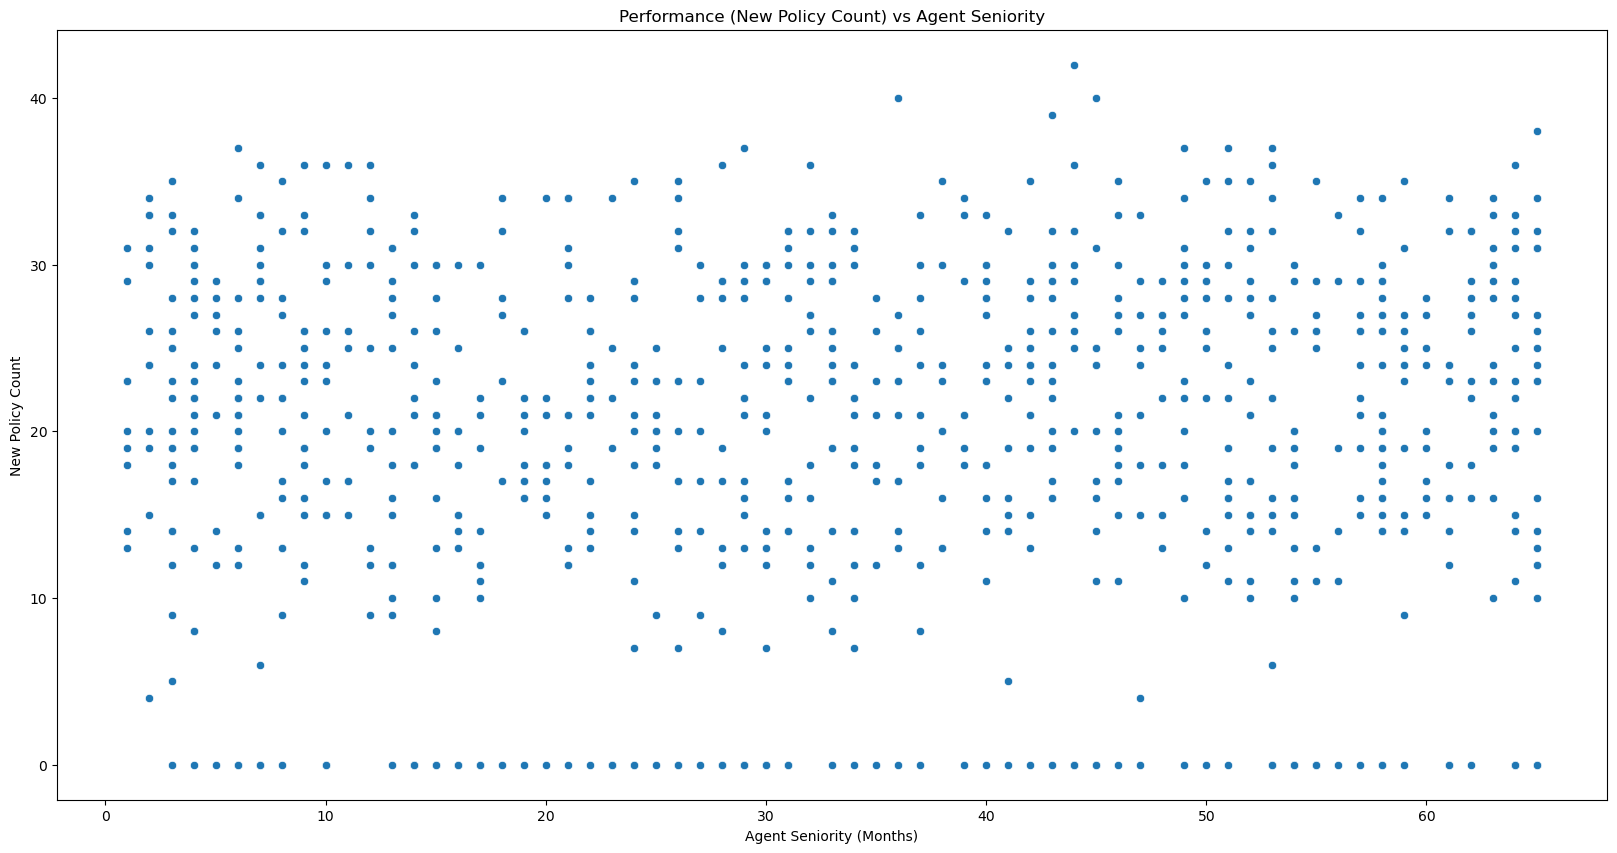

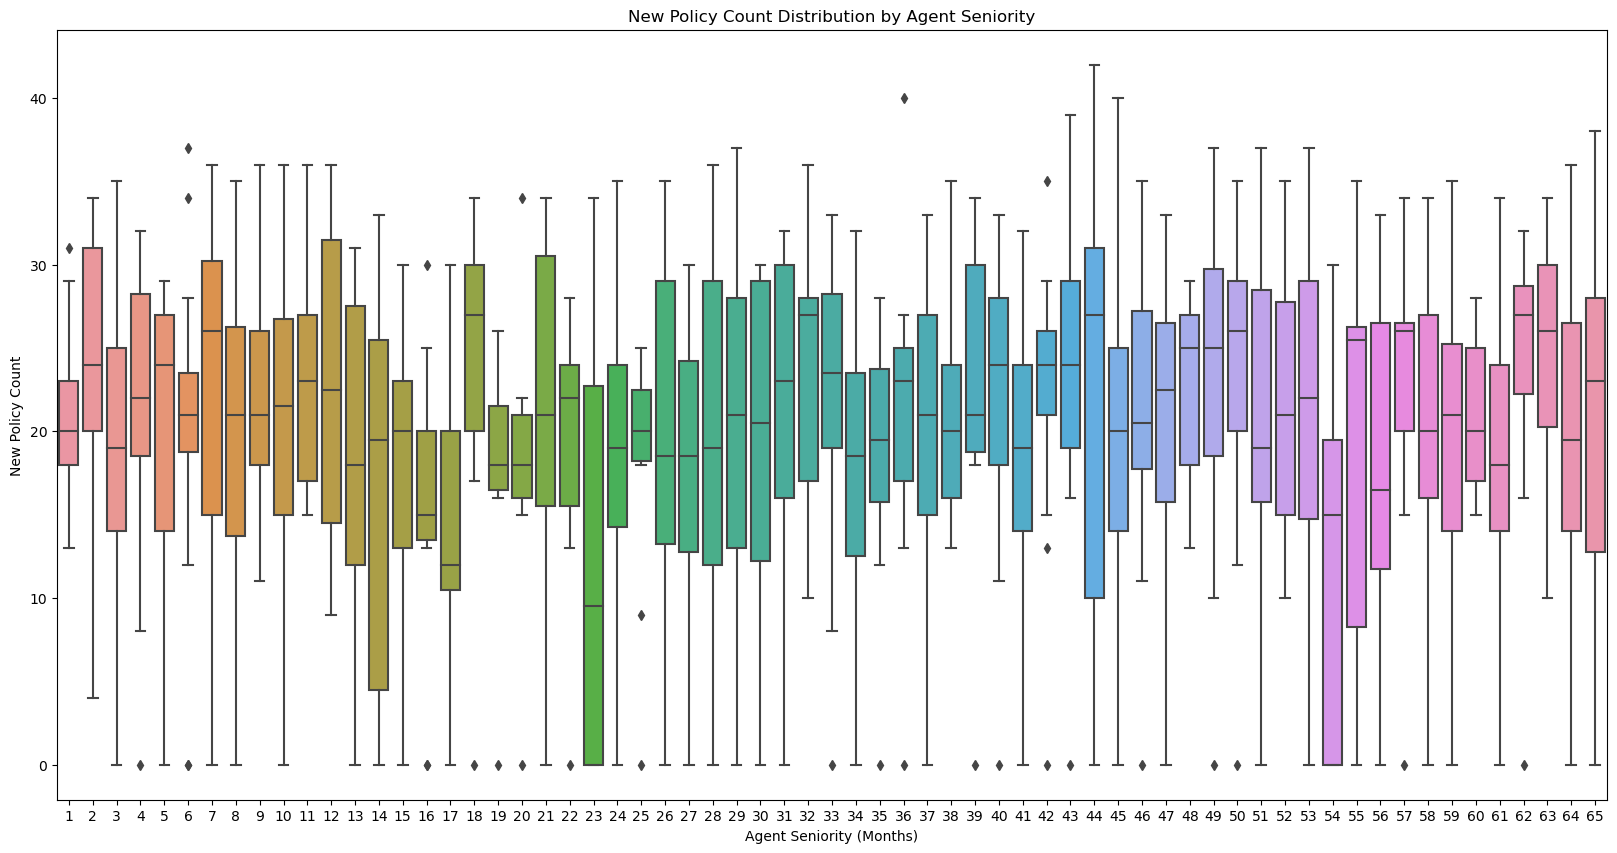

In [42]:

# Scatter plot: Performance vs Agent Seniority (e.g., new_policy_count)
plt.figure(figsize=(20, 10))
sns.scatterplot(x=train_df['agent_seniority'], y=train_df['new_policy_count'])
plt.title('Performance (New Policy Count) vs Agent Seniority')
plt.xlabel('Agent Seniority (Months)')
plt.ylabel('New Policy Count')
plt.show()

# Box plot: Distribution of performance based on agent seniority ranges
plt.figure(figsize=(20, 10))
sns.boxplot(x=train_df['agent_seniority'], y=train_df['new_policy_count'])
plt.title('New Policy Count Distribution by Agent Seniority')
plt.xlabel('Agent Seniority (Months)')
plt.ylabel('New Policy Count')
plt.show()


#### This shows that , based on seniority , new policy count dosent change , Not depend on it p value >0.05

In [43]:
from scipy import stats

# Perform ANOVA to test the difference in 'new_policy_count' across 'agent_seniority' groups
seniority_groups = [train_df[train_df['agent_seniority'] == i]['new_policy_count'] for i in range(1, 65)]
f_stat, p_value = stats.f_oneway(*seniority_groups)
print(f"ANOVA result: F-statistic={f_stat}, p-value={p_value}")


ANOVA result: F-statistic=0.9618185200325187, p-value=0.5620820816849823


### Lets check How long(Months) it took to do first sale for agents 

In [44]:
# train_df["time_to_first_sale"] = (train_df['first_policy_sold_month'] - train_df['agent_join_month']).dt.days


In [45]:
# Calculate time to first sale in months
train_df['time_to_first_sale_months'] = (train_df['first_policy_sold_month'].dt.year - train_df['agent_join_month'].dt.year) * 12 + \
                                          (train_df['first_policy_sold_month'].dt.month - train_df['agent_join_month'].dt.month)

# Display the result
print(train_df[['agent_code', 'agent_join_month', 'first_policy_sold_month', 'time_to_first_sale_months']].head())


  agent_code agent_join_month first_policy_sold_month  \
0   de9a845f       2020-06-01              2022-04-01   
1   1450745b       2019-05-01              2022-08-01   
2   5c4dd08c       2019-06-01              2022-06-01   
3   3c7a8b50       2021-05-01              2023-09-01   
4   3dd0c2a1       2022-09-01              2023-11-01   

   time_to_first_sale_months  
0                         22  
1                         39  
2                         36  
3                         28  
4                         14  


In [46]:
print(train_df["time_to_first_sale_months"])

0      22
1      39
2      36
3      28
4      14
       ..
909    20
910    13
911    12
912    25
913    28
Name: time_to_first_sale_months, Length: 914, dtype: int32


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


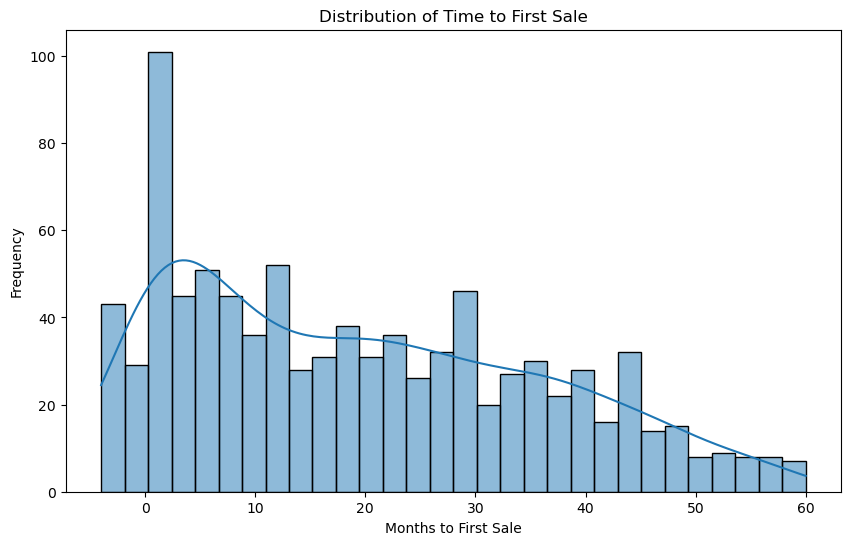

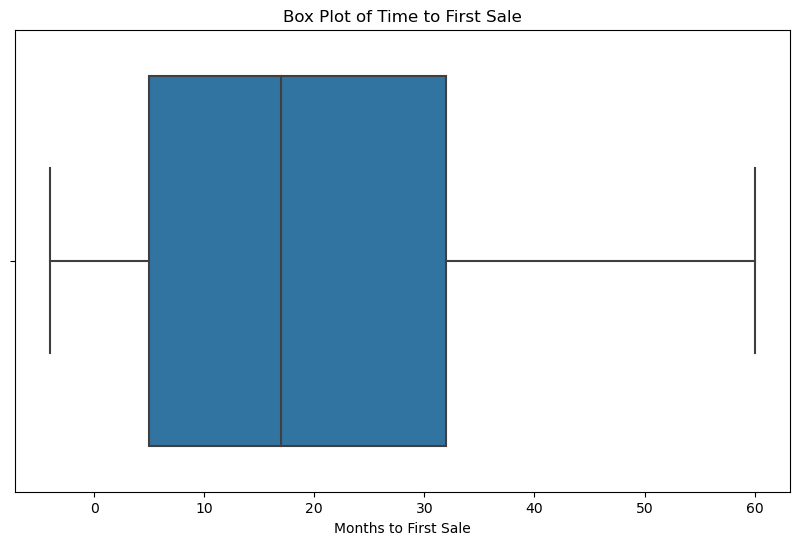

In [47]:
# Plot the distribution of time_to_first_sale
plt.figure(figsize=(10, 6))
sns.histplot(train_df['time_to_first_sale_months'], kde=True, bins=30)
plt.title('Distribution of Time to First Sale')
plt.xlabel('Months to First Sale')
plt.ylabel('Frequency')
plt.show()

# Box plot to see the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['time_to_first_sale_months'])
plt.title('Box Plot of Time to First Sale')
plt.xlabel('Months to First Sale')
plt.show()


since No outliers 

### Lets checek agent perfrormance

In [48]:
# Extract month, quarter, and year from 'year_month'
train_df['month'] = train_df['year_month'].dt.month
train_df['quarter'] = train_df['year_month'].dt.quarter
train_df['year'] = train_df['year_month'].dt.year


In [49]:
# Group by agent_code and year_month to calculate the sum of new_policy_count for each agent in each month
agent_sales_by_month = train_df.groupby(['agent_code', 'year_month'])['new_policy_count'].sum().reset_index()

# Display the result
print(agent_sales_by_month.head())


  agent_code year_month  new_policy_count
0   003c1999 2024-09-01                27
1   00d5bda3 2024-09-01                14
2   012a3553 2024-09-01                27
3   012f0e15 2024-09-01                16
4   0177ed5f 2024-09-01                17


In [50]:
# Filter the data for the first agent (agent_code = '003c1999')
first_agent_sales = agent_sales_by_month[agent_sales_by_month['agent_code'] == '003c1999']

# Display all rows for that agent
print(first_agent_sales)


  agent_code year_month  new_policy_count
0   003c1999 2024-09-01                27


### For each agent we can display trend

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


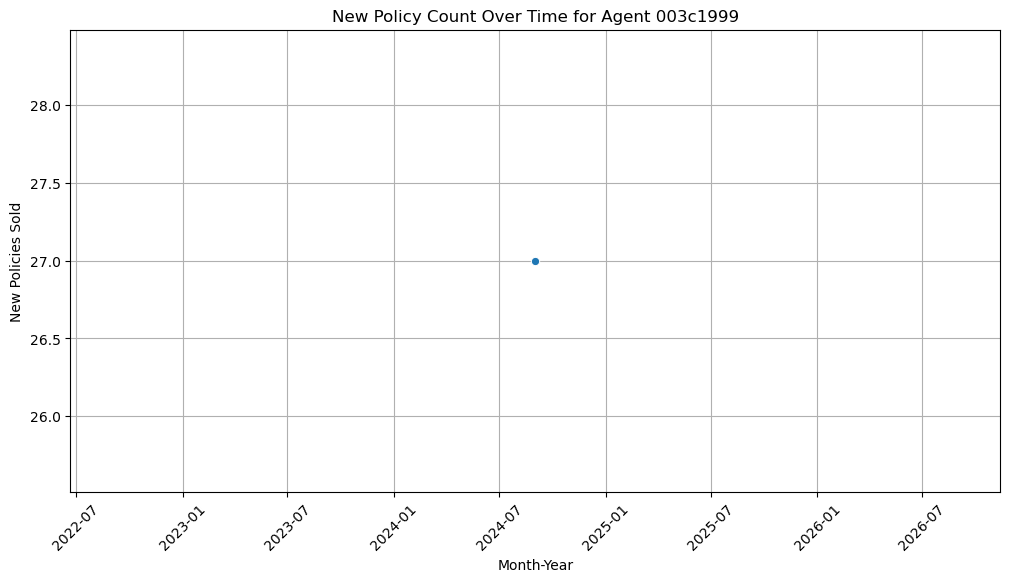

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific agent (agent_code = '003c1999')
agent_data = train_df[train_df['agent_code'] == '003c1999']

# Plot the new_policy_count over time (year_month)
plt.figure(figsize=(12, 6))
sns.lineplot(data=agent_data, x='year_month', y='new_policy_count', marker='o')

# Set plot labels and title
plt.title('New Policy Count Over Time for Agent 003c1999')
plt.xlabel('Month-Year')
plt.ylabel('New Policies Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [52]:
train_df

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0         1   de9a845f         43       2020-06-01              2022-04-01   
1         2   1450745b         32       2019-05-01              2022-08-01   
2         3   5c4dd08c         52       2019-06-01              2022-06-01   
3         4   3c7a8b50         21       2021-05-01              2023-09-01   
4         5   3dd0c2a1         33       2022-09-01              2023-11-01   
..      ...        ...        ...              ...                     ...   
909     910   8f77f8e4         55       2020-05-01              2022-01-01   
910     911   a199082b         60       2021-10-01              2022-11-01   
911     912   9c2e3be7         45       2022-07-01              2023-07-01   
912     913   89cb3dd5         23       2021-05-01              2023-06-01   
913     914   003c1999         35       2020-08-01              2022-12-01   

    year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   2024-09-01                             0                              2   
1   2024-09-01                             1                              3   
2   2024-09-01                             2                              6   
3   2024-09-01                             1                              6   
4   2024-09-01                             0                              4   
..         ...                           ...                            ...   
909 2024-09-01                             2                              1   
910 2024-09-01                             2                              1   
911 2024-09-01                             3                              5   
912 2024-09-01                             3                              5   
913 2024-09-01                             0                              2   

     unique_proposals_last_21_days  unique_proposal  ...  pca_quotations_2  \
0                               12               17  ...          0.258659   
1                                4               13  ...          0.656853   
2                               17               27  ...          0.318099   
3                               17               26  ...          0.708794   
4                                2                8  ...          0.629957   
..                             ...              ...  ...               ...   
909                             11               16  ...          0.337496   
910                             15               21  ...          0.191598   
911                             14               27  ...          0.318132   
912                              7               19  ...          0.290508   
913                             17               22  ...          0.555287   

     pca_customers_1  pca_customers_2  pca_proposal_1  pca_proposal_2  \
0           0.580553         0.852753        0.523956        0.298884   
1           0.237887         0.314606        0.300501        0.587447   
2           0.670597         0.500049        0.823880        0.683560   
3           0.483044         0.198282        0.803084        0.636476   
4           0.432710         0.478425        0.163674        0.544539   
..               ...              ...             ...             ...   
909         0.414625         0.365641        0.485093        0.272944   
910         0.173010         0.527238        0.658823        0.271130   
911         0.483044         0.198282        0.769000        0.773846   
912         0.342478         0.716220        0.480246        0.804086   
913         0.663324         0.294591        0.715662        0.251505   

     agent_seniority  time_to_first_sale_months  month  quarter  year  
0                 51                         22      9        3  2024  
1                 64                         39      9        3  2024  
2                 63                         36      9        3  2024  
3                

In [53]:
train_df.columns

Index(['row_id', 'agent_code', 'agent_age', 'agent_join_month',
       'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days',
       'unique_proposals_last_15_days', 'unique_proposals_last_21_days',
       'unique_proposal', 'unique_quotations_last_7_days',
       'unique_quotations_last_15_days', 'unique_quotations_last_21_days',
       'unique_quotations', 'unique_customers_last_7_days',
       'unique_customers_last_15_days', 'unique_customers_last_21_days',
       'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income',
       'number_of_policy_holders', 'number_of_cash_payment_policies',
       'ANBP_value_boxcox_added', 'net_income_boxcox_added',
       'number_of_policy_holders_boxcox_added',
       'number_of_cash_payment_policies_boxcox_added', 'cluster',
       'pca_quotations_1', 'pca_quotations_2', 'pca_customers_1',
       'pca_customers_2', 'pca_proposal_1', 'pca_proposal_2',
       'agent_seniority', 'time_to_first_sale_months', 'month', 'qua

In [54]:
from sklearn.preprocessing import LabelEncoder


new_categorical_columns = [
    'agent_code',
    'month',
    'quarter',
    'year',
    'cluster'
]


label_encoder = LabelEncoder()

for col in new_categorical_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

new_numerical_colsumns = [
    'agent_age',
    'new_policy_count',
    'agent_seniority',
    'time_to_first_sale_months',
    'ANBP_value_boxcox_added',
    'net_income_boxcox_added',
    'number_of_policy_holders_boxcox_added',
    'number_of_cash_payment_policies_boxcox_added',
    'pca_proposal_1', 
    'pca_proposal_2',
    'pca_quotations_1', 
    'pca_quotations_2', 
    'pca_customers_1',
    'pca_customers_2',
]

final_columns = new_categorical_columns + new_numerical_colsumns


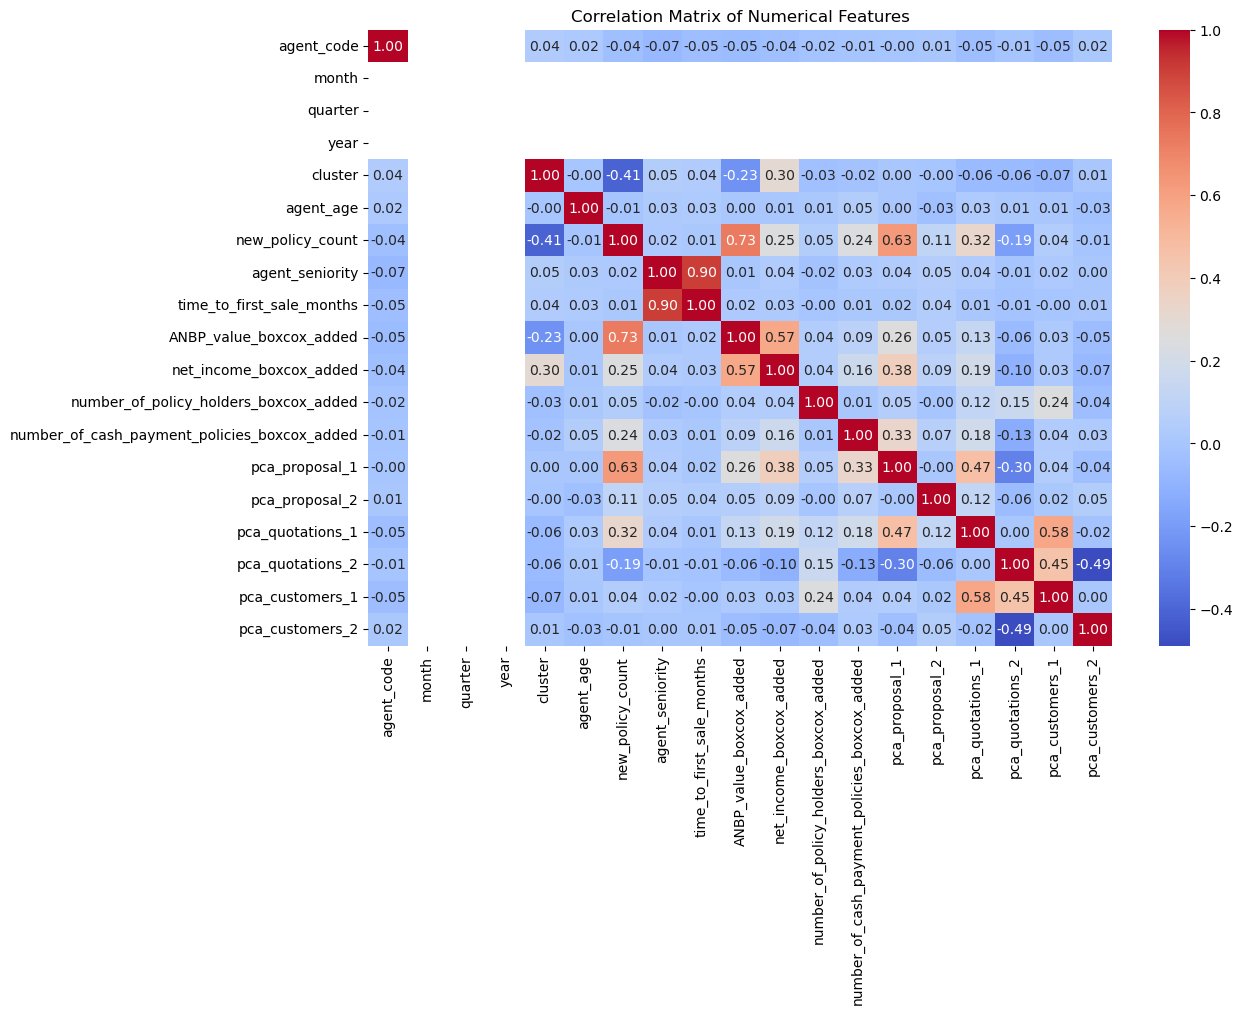

In [55]:
correlation_matrix = train_df[final_columns].corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [56]:
# train_df[numerical_cols].to_csv("test_numerical_columns.csv", index=False)

In [57]:
train_df[final_columns].to_csv("test_numerical_columns.csv", index=False)